# Ejercicio 5.4

LÍMITE DE DIFRACCIÓN DE UN TELESCOPIO.

Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de la luz en nuestros telescopios. La luz de las estrellas puede tratarse efectivamente como si viniera de una fuente puntual en el infinito. Cuando dicha luz, con longitud de onda λ, pasa a través de la abertura circular de un telescopio (que supondremos que tiene un radio de unidad) y está enfocado por el telescopio en el plano focal, no produce un solo punto, sino un patrón de difracción circular que consiste en un punto central rodeado por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción viene dada por:

\begin{equation*}
I(r)= \left ( \frac{J_{1}(kr)}{kr} \right )^{2}
\end{equation*}

donde r es la distancia en el plano focal desde el centro del patrón de difracción, $k = 2π / λ$, y $J1 (x)$ es una función de Bessel. Las funciones de Bessel $Jm (x)$ están dadas por:

\begin{equation*}
J_{m}(x)=\frac{1}{\pi }\int_{0}^{\pi }cos\left ( m\theta - xsen(\theta ) \right )d\theta 
\end{equation*}

donde m es un entero no negativo y $x ≥ 0$.

a) Escriba una función de Python $J(m,x)$ que calcule el valor de $Jm(x)$ usando la regla de Simpson con N=1000 puntos. Use su función en un programa para hacer un diagrama, en un solo gráfico, de las funciones de Bessel $J0$, $J1$ y $J2$ como una función de x de $x=0$ a $x=20$.

b) Haga un segundo programa que haga un diagrama de densidad de la intensidad del patrón de difracción circular de una fuente de luz puntual con $λ=500 nm$, en una región cuadrada del plano focal, usando la fórmula dada anteriormente. Su imagen debe cubrir valores de r desde cero hasta aproximadamente $1 μm$.

Sugerencia 1: puede resultarle útil saber que $lim x → 0 J 1 (x) / x = 12$. 

Sugerencia 2: El punto central en el patrón de difracción es tan brillante que puede ser difícil ver los anillos a su alrededor en la pantalla de la computadora. Si se encuentra con este problema, una forma sencilla de solucionarlo es utilizar uno de los otros esquemas de color para los gráficos de densidad descritos en la Sección 3.3. El esquema "en caliente" funciona bien. Para una solución más sofisticada al problema, la función imshow tiene un argumento adicional vmax que le permite establecer el valor que corresponde al punto más brillante de la gráfica. Por ejemplo, si dice "imshow (x, vmax = 0.1)", los elementos en x con valor 0.1, o cualquier valor mayor, producirán el color más brillante (más positivo) en la pantalla. Al reducir el valor vmax, puede reducir el rango total de valores entre el brillo mínimo y máximo y, por lo tanto, aumentar la sensibilidad de la gráfica, haciendo visibles detalles sutiles. (También hay un argumento vmin que puede usarse para establecer el valor que corresponde al color más tenue (más negativo).) Para este ejercicio, un valor de vmax = 0.01 parece funcionar bien.




In [18]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos,sin,pi,sqrt
from numpy import arange, zeros, array, loadtxt, linspace, empty
from pylab import imshow, xlabel,ylabel, plot, show, legend, hot

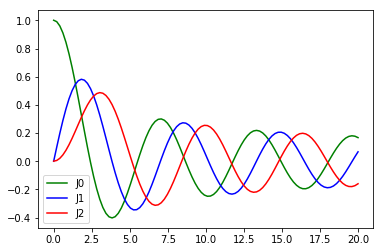

In [11]:
#Parte a.

#regla de simpson

def J(m, x):
    def f(m, x, theta):
        return cos(m*theta - x* sin(theta))

    N = 1000
    a = 0
    b = pi
    h = (b - a) / N

    oddSum = 0
     
    for k in range(1, N, 2):
        oddSum += f(m, x, a + k*h)

    evenSum = 0
    for k in range(1, N, 2):
        evenSum += f(m, x, a + k*h)

    return 1 / pi * 1 / 3 * h * (f(m, x, a) + f(m, x, b) + 4 * oddSum + 2 * evenSum)

# graficando

xpoints = linspace(0, 20, 100)
J0 = []
J1 = []
J2 = []
for x in xpoints:
    J0.append(J(0, x))
    J1.append(J(1, x))
    J2.append(J(2, x))

plot(xpoints, J0, "g", label='J0')
plot(xpoints, J1, "b", label='J1')
plot(xpoints, J2, "r", label='J2')
legend(loc='lower left')
show()



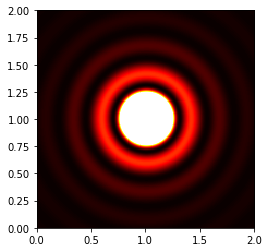

In [20]:
# Part b


def r(x, y):
    return sqrt(x**2 + y**2)

def I(r):
    if (r == 0):
        return 1/4

    Lambda = 0.5 # en micrometros
    kr = 2 * pi / Lambda * r
    return (J(1,kr)/ kr)**2

side = 2 # # longitud en micrómetros
points = 200 # número de puntos de cuadrícula en cada dirección
spacing = side/points

#  Calculo de la posición del centro.

xCenter = side/2
yCenter = side/2

# Hacemmos una matriz vacía para almacenar valores

intensities = empty([points, points], float)

# Calculando los valores en la matriz

for i in range(points):
    y = spacing * i
    for j in range(points):
        x = spacing * j
        dist = r(x - xCenter, y - yCenter)
        intensities[i, j] = I(dist)

imshow(intensities, origin="lower", extent=[0,side,0,side], vmax=0.01)
hot()
show()